In [9]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


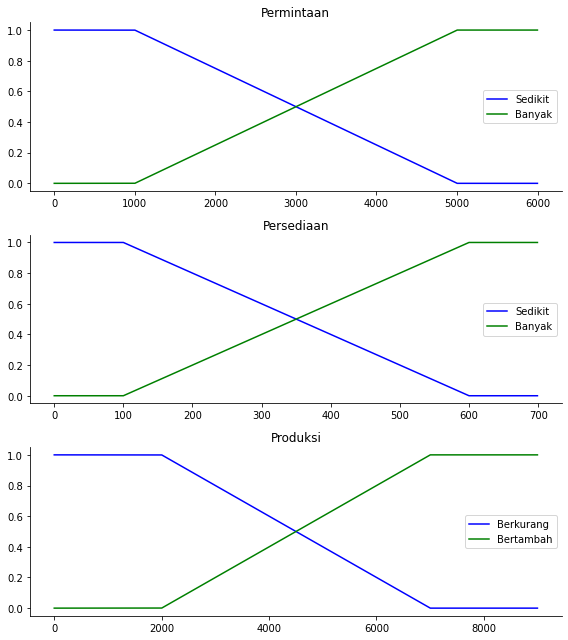

In [10]:

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

%matplotlib inline
# Generate universe variables

x_minta = np.arange(0, 6000, 1)
x_sedia = np.arange(0, 700, 1)
x_produksi  = np.arange(0, 9000, 1)

# Generate fuzzy membership functions
minta_sd = fuzz.trapmf(x_minta, [0, 0, 1000, 5000])
minta_by = fuzz.trapmf(x_minta, [1000, 5000, 6000, 6000])

sedia_sd = fuzz.trapmf(x_sedia, [0, 0, 100, 600])
sedia_by = fuzz.trapmf(x_sedia, [100, 600, 700, 700])

produksi_kr  = fuzz.trapmf(x_produksi, [0, 0, 2000, 7000])
produksi_tb  = fuzz.trapmf(x_produksi, [2000, 7000, 9000, 9000])


# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_minta, minta_sd, 'b', linewidth=1.5, label='Sedikit')
ax0.plot(x_minta, minta_by, 'g', linewidth=1.5, label='Banyak')

ax0.set_title('Permintaan')
ax0.legend()

ax1.plot(x_sedia, sedia_sd, 'b', linewidth=1.5, label='Sedikit')
ax1.plot(x_sedia, sedia_by, 'g', linewidth=1.5, label='Banyak')


ax1.set_title('Persediaan')
ax1.legend()

ax2.plot(x_produksi, produksi_kr, 'b', linewidth=1.5, label='Berkurang')
ax2.plot(x_produksi, produksi_tb, 'g', linewidth=1.5, label='Bertambah')

ax2.set_title('Produksi')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [11]:
minta = 3000
sedia = 300

In [12]:
## Lur DEFuzzyfikasi
in1 = []
in1.append(fuzz.interp_membership(x_minta, minta_sd, minta))
in1.append(fuzz.interp_membership(x_minta, minta_by, minta))
in2 = []
in2.append(fuzz.interp_membership(x_sedia, sedia_sd, sedia))
in2.append(fuzz.interp_membership(x_sedia, sedia_by, sedia))

print("Derajat Kranggotaan Persediaan ")
if in1[0]>0 :
    print("Sedikit : "+str(in2[0]))
if in1[1]>0 :
    print("Banyak  : "+ str(in2[1]))

print("")
print("Derajat Kranggotaan Permintaan")
if in2[0]>0 :
    print("Sedikit : "+str(in1[0]))
if in2[1]>0 :
    print("Banyak  : "+ str(in1[1]))

Derajat Kranggotaan Persediaan 
Sedikit : 0.6
Banyak  : 0.4

Derajat Kranggotaan Permintaan
Sedikit : 0.5
Banyak  : 0.5


In [13]:
## Rules and Inferences Tsukamoto
# krg = 7000 - (active_rule3)*5000
# tbh = 5000*deg + 2000

apred1  = np.fmin(in1[1], in2[1])
print("nilai apred1 = ", apred1)
z1      = 5000*apred1 + 2000

apred2  = np.fmin(in1[0], in2[0])
print("nilai apred2 = ", apred2)
z2      = 7000-(apred2)*5000

apred3  = np.fmin(in1[0], in2[1])
print("nilai apred3 = ", apred3)
z3      = 7000-(apred3)*5000

apred4  = np.fmin(in1[1], in2[0])
print("nilai apred4 = ", apred4)
z4      = 5000*apred4 + 2000

print(z1,z2,z3,z4)
## Defazzyfication
z = (apred1*z1 + apred2*z2 + apred3*z3 + apred4*z4)/ (apred1 + apred2+ apred3 + apred4)

nilai apred1 =  0.4
nilai apred2 =  0.5
nilai apred3 =  0.4
nilai apred4 =  0.5
4000.0 4500.0 5000.0 4500.0


In [14]:
print("Barang yang harus di produksi : "+str(int(z)))

Barang yang harus di produksi : 4500
